In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
gt1= pd.read_csv('gas_turbines.csv')

In [3]:
gt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gt1.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [5]:
gt1.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

In [6]:
le = LabelEncoder()

In [7]:
cc = ["AT","AP","AH","AFDP","GTEP","TIT","TAT","TEY","CDP","CO","NOX"]

In [8]:
for i in cc:
    gt1[i] = le.fit_transform(gt1[i])
    gt=gt1

In [9]:
gt

AT   AP     AH  AFDP  GTEP  TIT   TAT  TEY  CDP     CO    NOX
0      1230  292  12092  2208   787  292  2285  707  461  10695  10885
1      1199  297  12149  2207   842  293  2285  709  454  10775  10892
2      1251  301  11882  2148   883  294  2272  708  457  10746  10835
3      1334  305  11699  2138   892  296  2284  709  462  10738  10875
4      1505  310  11676  2197   871  297  2283  709  468  10782  10774
...     ...  ...    ...   ...   ...  ...   ...  ...  ...    ...    ...
15034  2278  269  12369  2376   382  197  1964  491  256  11809  10229
15035  1732  272  12467  2230   577  163  1742  508  289  12015  10317
15036  1433  276  12533  2121   675   83  1247  352  339  12818  11571
15037  1302  281  12449  2009   545  135  1583  406  389  12579  11636
15038  1266  285  12227  1953   485  199  1939  488  439  12087  11620

[15039 rows x 11 columns]

In [ ]:
x=gt.iloc[:,gt.columns!='TEY']
y=gt.iloc[:,5]

<AxesSubplot:>

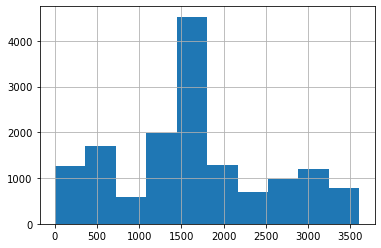

In [10]:
gt['CDP'].hist()

<AxesSubplot:>

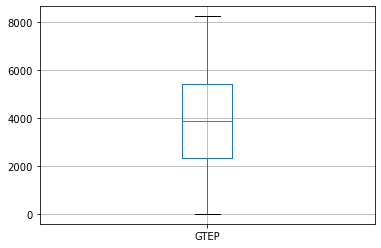

In [11]:
gt.boxplot(column=['GTEP'])

<AxesSubplot:>

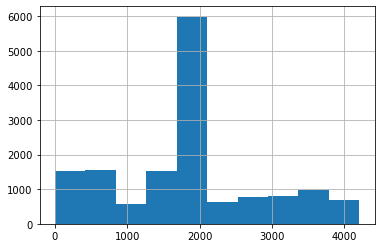

In [12]:
gt['TEY'].hist()

<AxesSubplot:>

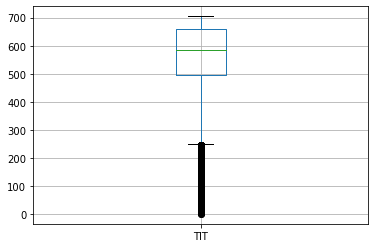

In [13]:
gt.boxplot(column= ['TIT'])

<AxesSubplot:>

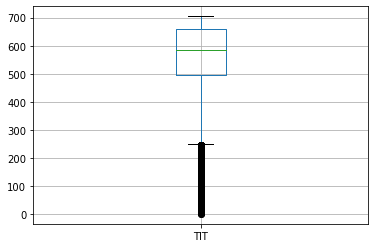

In [14]:
gt.boxplot(column=['TIT'])

<AxesSubplot:>

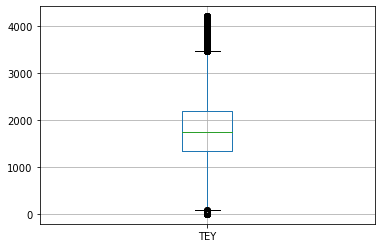

In [15]:
gt.boxplot(column=['TEY'])

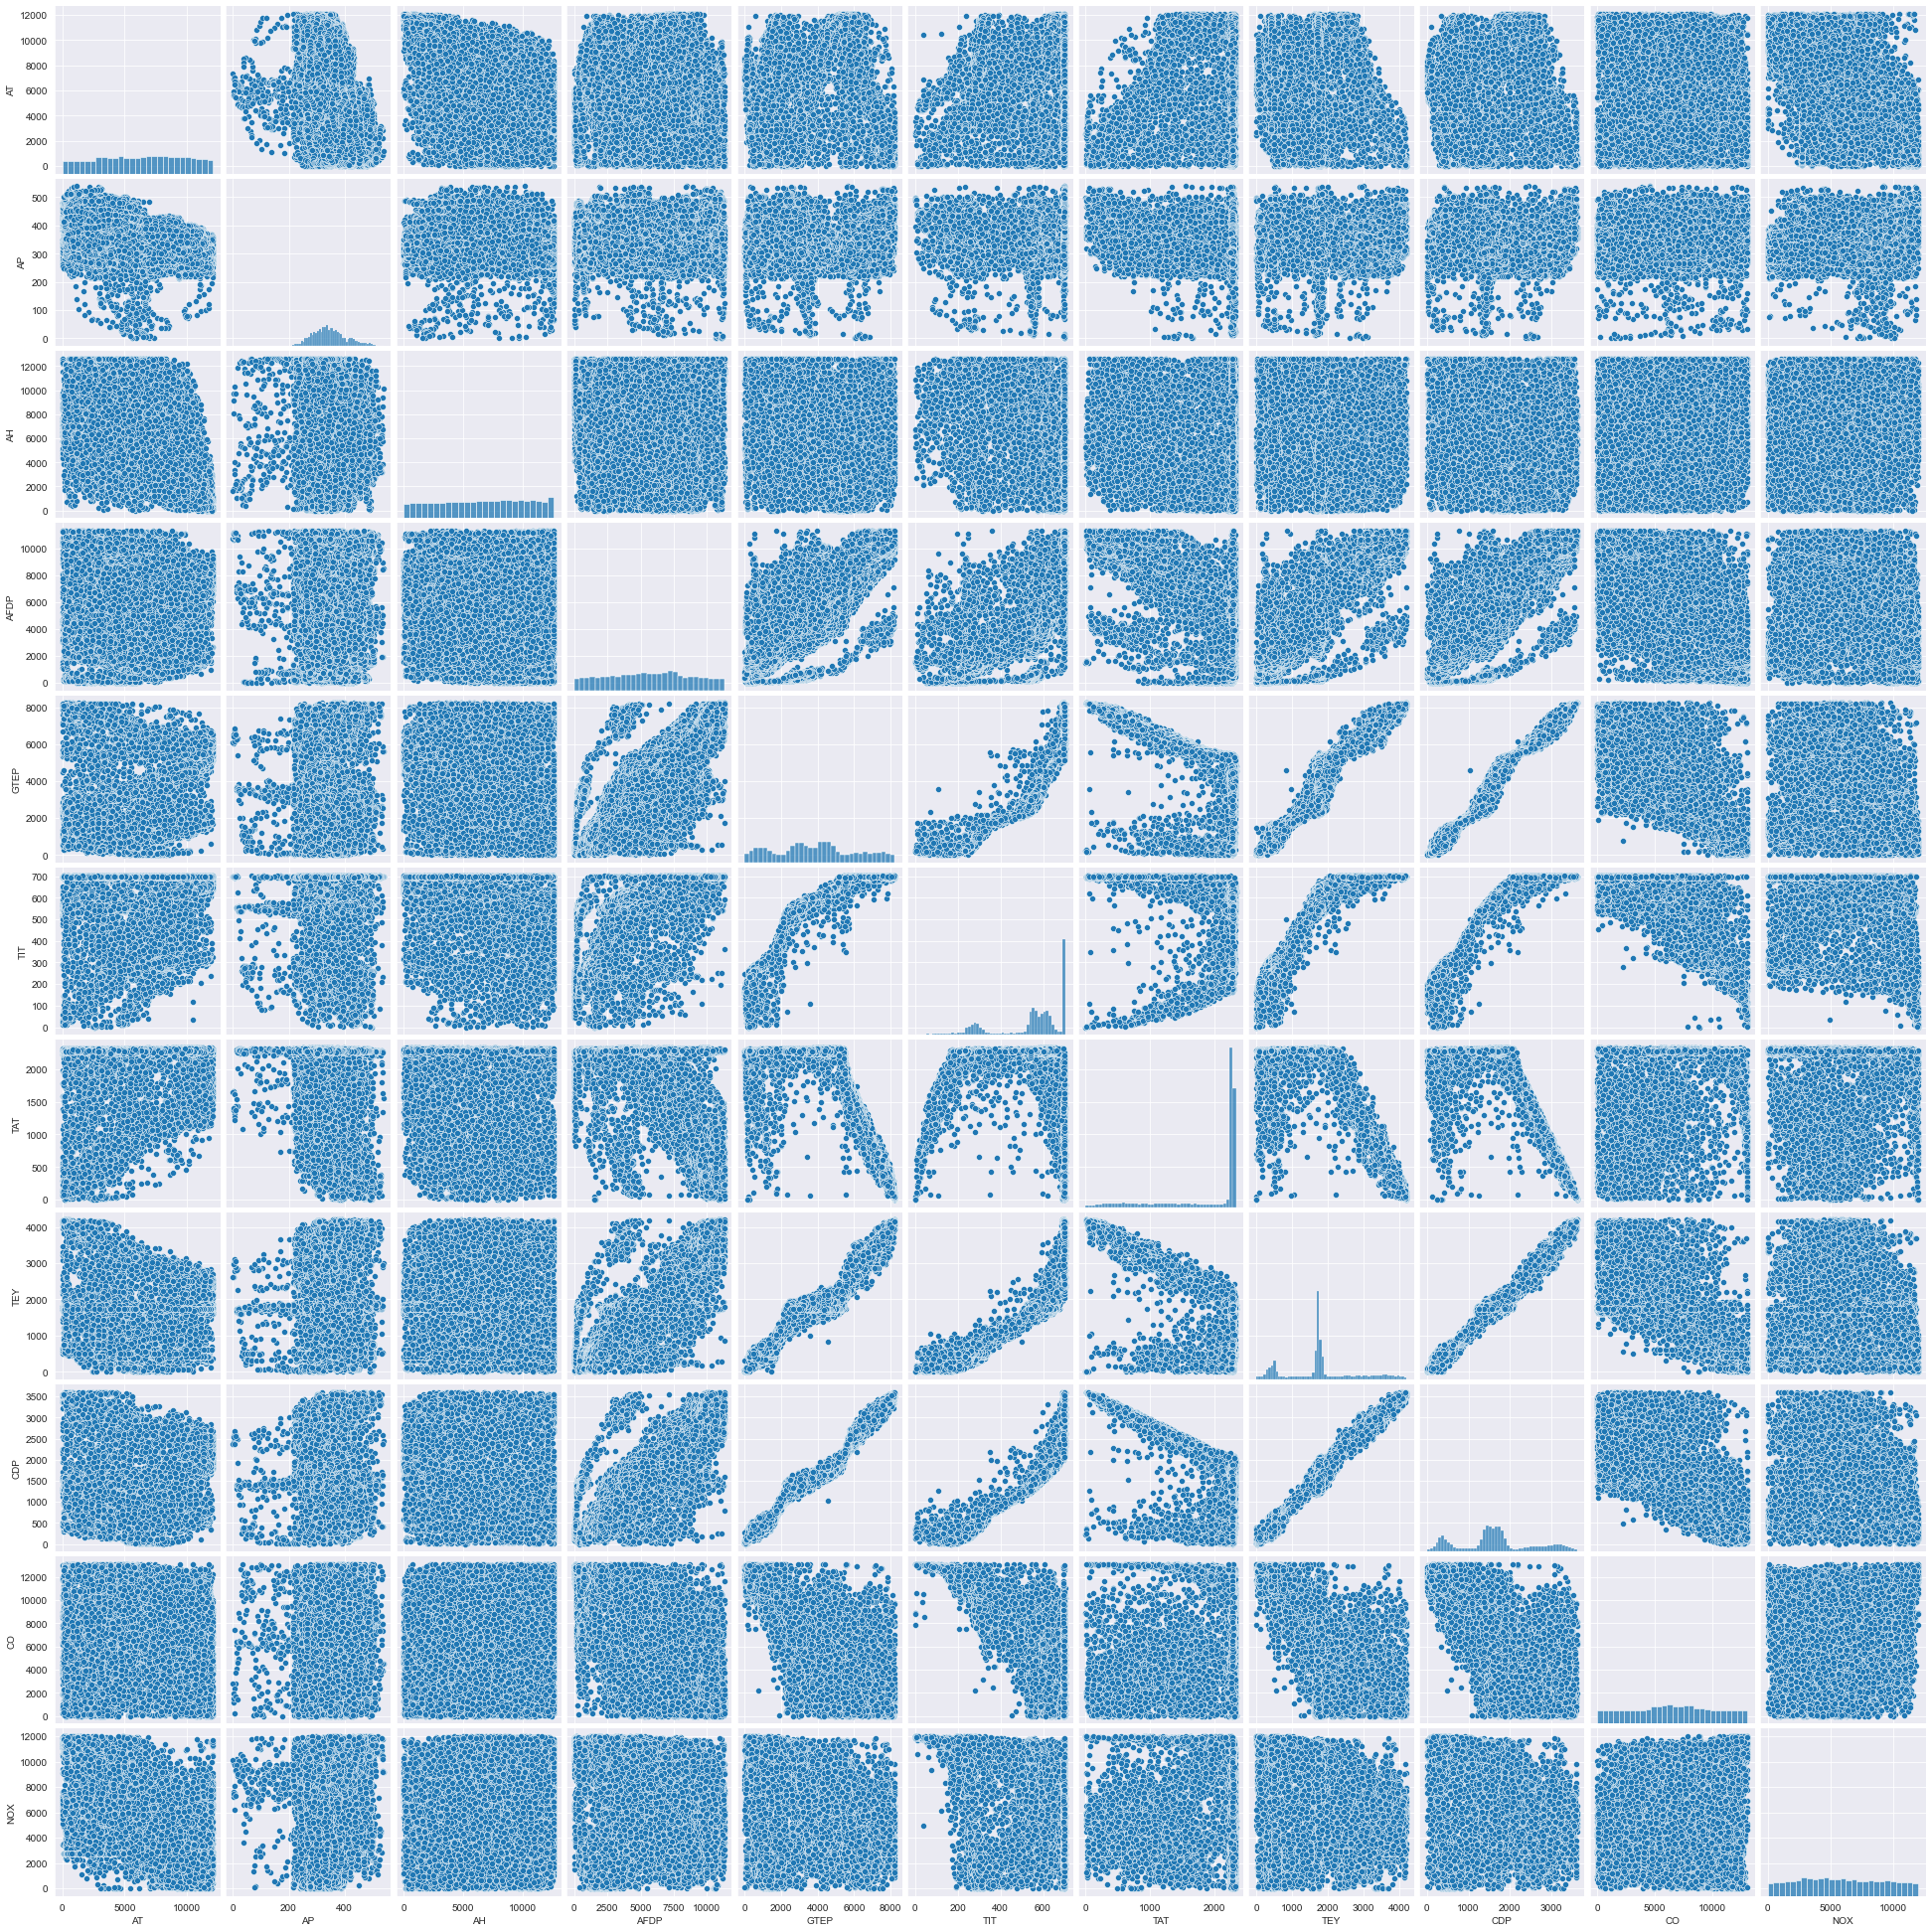

In [16]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(gt)

In [17]:
"correlation between TIT-GTEP, CDP-GTEP, CDP-TIT"
"CDP,TIT,TEY contains outliers"

'CDP,TIT,TEY contains outliers'

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('TEY~AT+AP+AH+AFDP+GTEP+TIT+TAT+CDP+CO+NOX', data= gt).fit()

In [19]:
model.params

Intercept    1101.206730
AT             -0.063840
AP             -0.492722
AH             -0.004151
AFDP           -0.004034
GTEP            0.045699
TIT             3.065254
TAT            -0.438448
CDP             0.246510
CO              0.002094
NOX            -0.012740
dtype: float64

In [20]:
print(model.tvalues , '\n', model.pvalues)

Intercept    120.043292
AT          -153.294172
AP           -52.038824
AH           -19.641427
AFDP         -14.358691
GTEP          20.067809
TIT           92.499397
TAT          -77.119419
CDP           28.112931
CO             8.622280
NOX          -47.549241
dtype: float64 
 Intercept     0.000000e+00
AT            0.000000e+00
AP            0.000000e+00
AH            7.907977e-85
AFDP          1.906938e-46
GTEP          2.025009e-88
TIT           0.000000e+00
TAT           0.000000e+00
CDP          1.602186e-169
CO            7.210968e-18
NOX           0.000000e+00
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9955346198584161, 0.9955316484848856)

## Simple linear regression model

In [22]:
ml_TIT = smf.ols('TEY~TIT', data=gt).fit()
#t and p-Values
print(ml_TIT.tvalues, '\n', ml_TIT.pvalues)

Intercept    -72.881860
TIT          211.380329
dtype: float64 
 Intercept    0.0
TIT          0.0
dtype: float64


In [23]:
ml_GTEP = smf.ols('TEY~GTEP', data=gt).fit()
#t and p-Values
print(ml_GTEP.tvalues, '\n', ml_GTEP.pvalues)

Intercept     23.326137
GTEP         386.725810
dtype: float64 
 Intercept    2.997474e-118
GTEP          0.000000e+00
dtype: float64


In [24]:
ml_CDP = smf.ols('TEY~CDP', data=gt).fit()
#t and p-Values
print(ml_CDP.tvalues, '\n', ml_CDP.pvalues)

Intercept     -4.264105
CDP          686.012141
dtype: float64 
 Intercept    0.00002
CDP          0.00000
dtype: float64


In [25]:
ml_TGC = smf.ols('TEY~TIT+GTEP+CDP', data=gt).fit()
#t and p-Values
print(ml_TGC.tvalues, '\n', ml_TGC.pvalues)

Intercept     -1.369751
TIT           -5.832901
GTEP         -64.893355
CDP          207.654130
dtype: float64 
 Intercept    1.707852e-01
TIT          5.559094e-09
GTEP         0.000000e+00
CDP          0.000000e+00
dtype: float64


In [26]:
from statsmodels.graphics.regressionplots import influence_plot

import statsmodels.api as sm
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

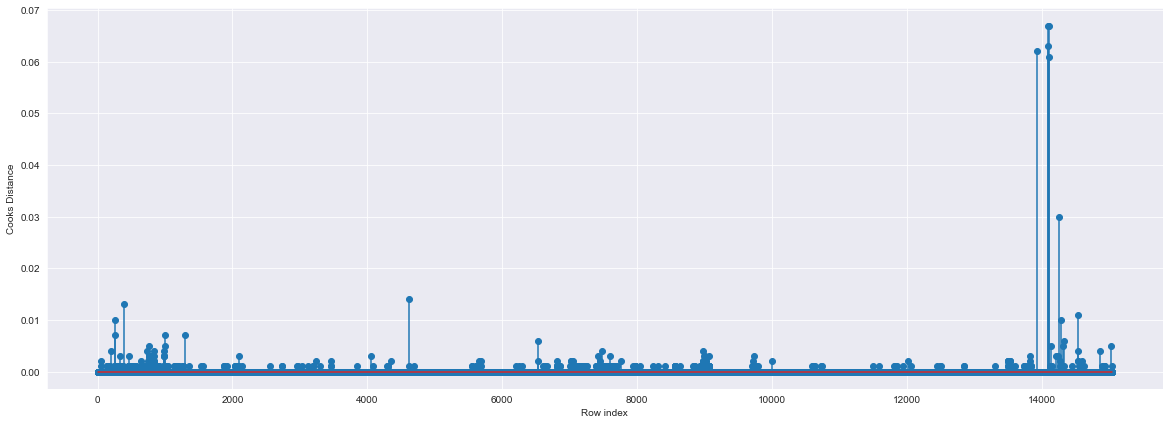

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(gt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(14085, 0.06699334523403999)

# Calculating VIF

In [29]:
rsq_TIT = smf.ols('TIT~AT+AP+AH+AFDP+GTEP+TEY+TAT+CDP+CO+NOX', data = gt).fit().rsquared
vif_TIT = 1/(1-rsq_TIT)

In [30]:
vif_TIT

154.7816147145865

In [31]:
rsq_CDP = smf.ols('CDP~AT+AP+AH+AFDP+GTEP+TEY+TAT+TIT+CO+NOX', data = gt).fit().rsquared
vif_CDP = 1/(1-rsq_CDP)

In [32]:
vif_CDP

214.59240383776796

In [33]:
rsq_GTEP = smf.ols('GTEP~AT+AP+AH+AFDP+TIT+TEY+TAT+CDP+CO+NOX', data = gt).fit().rsquared
vif_GTEP = 1/(1-rsq_GTEP)

In [34]:
vif_GTEP

85.15602698343362

In [35]:
rsq_TAT = smf.ols('TAT~AT+AP+AH+AFDP+GTEP+TEY+TIT+CDP+CO+NOX', data = gt).fit().rsquared
vif_TAT = 1/(1-rsq_TAT)

In [36]:
vif_TAT

64.51024223133562

In [37]:
rsq_AT = smf.ols('AT~TIT+AP+AH+AFDP+GTEP+TEY+TAT+CDP+CO+NOX', data = gt).fit().rsquared
vif_AT = 1/(1-rsq_AT)

In [38]:
vif_AT

16.777527953210306

In [39]:
rsq_CO = smf.ols('CO~AT+AP+AH+AFDP+GTEP+TEY+TAT+CDP+TIT+NOX', data = gt).fit().rsquared
vif_CO = 1/(1-rsq_CO)

In [40]:
vif_CO

2.5956145255860013

In [41]:
#  variable has VIF>20, Collinearity exist

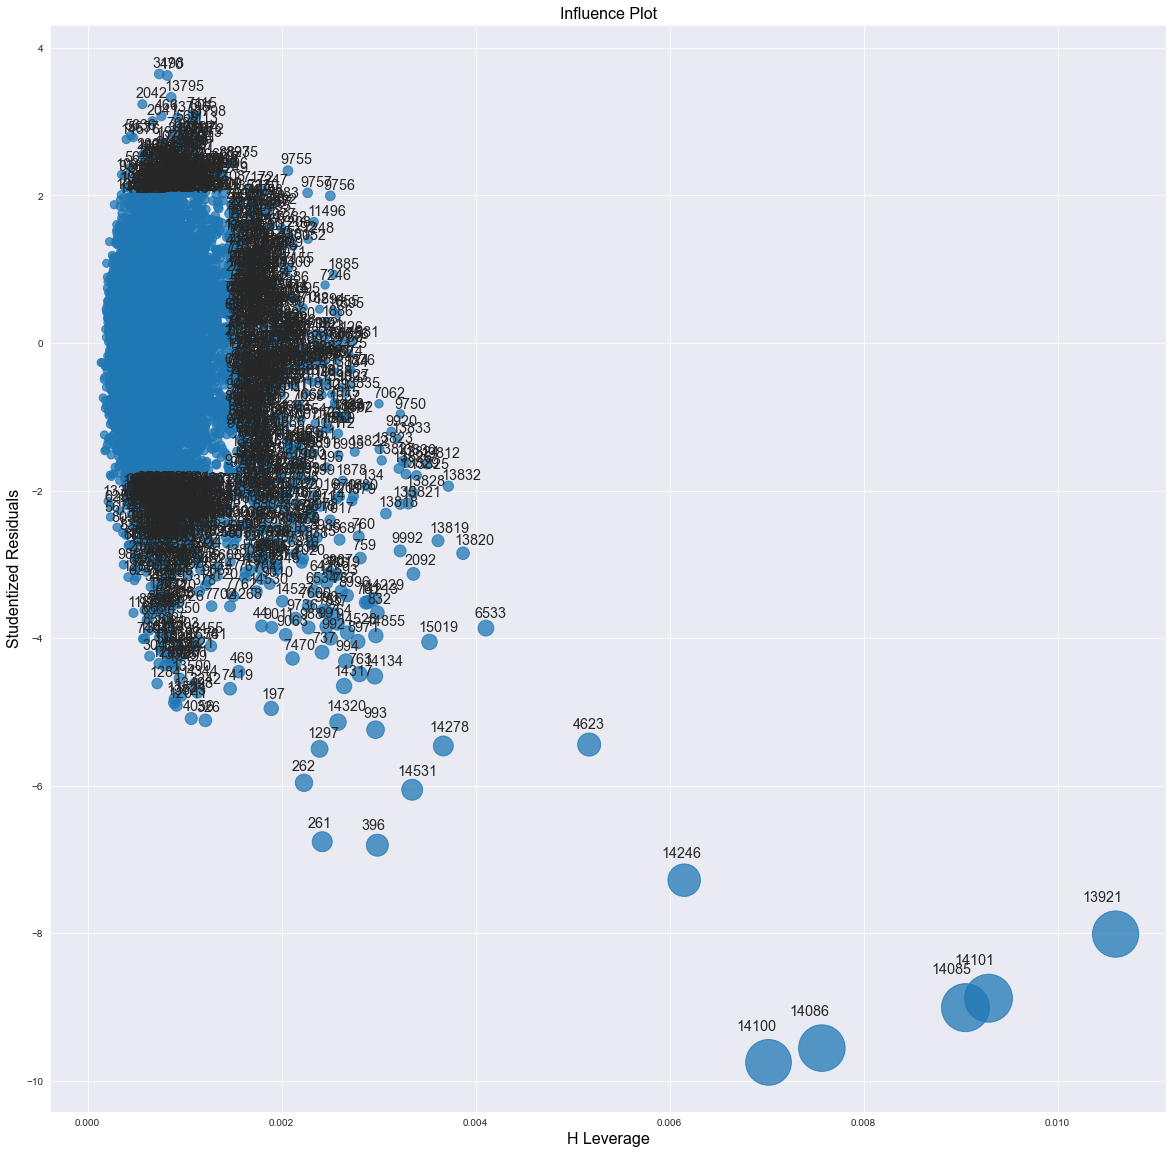

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
#fig = plt.subplots(figsize=(20,20))
#influence_plot(model)
#plt.show()
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [43]:
k = gt.shape[1]
n = gt.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0023937761819269898

In [44]:
gt[gt.index.isin([14085])]

AT   AP    AH  AFDP  GTEP  TIT  TAT  TEY  CDP    CO    NOX
14085  2566  497  5238  1485   228    0    0    2  236  8883  11984

In [45]:
#load the data
gt_new = pd.read_csv('gas_turbines.csv.')

## dropping high values

In [46]:
gt2 = gt_new.drop(gt_new.index[[14085]],  axis = 0).reset_index()

In [68]:
gt2 = gt_new.drop(gt_new.index[[13921]],  axis = 0).reset_index()

In [69]:
gt2 = gt_new.drop(gt_new.index[[14101]],  axis = 0).reset_index()

In [ ]:
gt2 = gt_new.drop(gt_new.index[[14086]],  axis = 0).reset_index()

In [65]:
gt2 = gt_new.drop(gt_new.index[[14100]],  axis = 0).reset_index()

In [66]:
gt2 = gt_new.drop(gt_new.index[[14246]],  axis = 0).reset_index()

In [ ]:
gt2 = gt_new.drop(gt_new.index[[4623]],  axis = 0).reset_index()

In [67]:
gt2 = gt_new.drop(gt_new.index[[14278]],  axis = 0).reset_index()

In [70]:
#dropping the orginal index
gt2 = gt2.drop(['index'],axis=1)

In [71]:
gt2

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15033  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15034  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15035  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15036  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15037  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15033  4.5186  79.559  
15034  4.8470  79.917  
15035  7.9632  90.912  
15036  6.2494  93.227  
15037  4.9816  92.498  

[15038 rows x 11 columns]

In [73]:
from sklearn import preprocessing

In [74]:
label_encoder = preprocessing.LabelEncoder()
gt2['TIT'] = label_encoder.fit_transform(gt2['TIT'])
gt2['GTEP'] = label_encoder.fit_transform(gt2['GTEP'])
gt2['CDP'] = label_encoder.fit_transform(gt2['CDP'])
gt2['AT'] = label_encoder.fit_transform(gt2['AT'])
gt2['AP'] = label_encoder.fit_transform(gt2['AP'])
gt2['AH'] = label_encoder.fit_transform(gt2['AH'])
gt2['AFDP'] = label_encoder.fit_transform(gt2['AFDP'])
gt2['TAT'] = label_encoder.fit_transform(gt2['TAT'])
gt2['CO'] = label_encoder.fit_transform(gt2['CO'])
gt2['NOX'] = label_encoder.fit_transform(gt2['NOX'])
gt2['TEY'] = label_encoder.fit_transform(gt2['TEY'])

In [75]:
gt2

AT   AP     AH  AFDP  GTEP  TIT   TAT  TEY  CDP     CO    NOX
0      1230  292  12091  2208   786  291  2284  706  461  10695  10885
1      1199  297  12148  2207   841  292  2284  708  454  10775  10892
2      1251  301  11881  2148   882  293  2271  707  457  10746  10835
3      1334  305  11698  2138   891  295  2283  708  462  10738  10875
4      1505  310  11675  2197   870  296  2282  708  468  10782  10774
...     ...  ...    ...   ...   ...  ...   ...  ...  ...    ...    ...
15033  2278  269  12368  2376   381  196  1963  490  256  11809  10229
15034  1732  272  12466  2230   576  162  1741  507  289  12015  10317
15035  1433  276  12532  2121   674   82  1246  351  339  12818  11571
15036  1302  281  12448  2009   544  134  1582  405  389  12579  11636
15037  1266  285  12226  1953   484  198  1938  487  439  12087  11620

[15038 rows x 11 columns]

In [78]:
model1 = gt2

In [81]:
#create model
model1 = Sequential()
model1.add(Dense(30, activation ='relu'))
model1.add(Dense(50, activation ='relu'))
model1.add(Dense(60, activation ='relu'))
#model.add(Dense(40, activation ='relu'))
model1.add(Dense(40, activation ='relu'))
model1.add(Dense(1, activation ='sigmoid'))

In [82]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
#fit the model 
history = model1.fit(x,y, validation_split=0.33, epochs = 20, batch_size = 64)

Epoch 1/20
158/158 [==============================] - 2s 10ms/step - loss: -23315451904.0000 - accuracy: 0.0000e+00 - val_loss: -127328378880.0000 - val_accuracy: 2.0149e-04
Epoch 2/20
158/158 [==============================] - 1s 4ms/step - loss: -2527033032704.0000 - accuracy: 0.0000e+00 - val_loss: -7104581599232.0000 - val_accuracy: 2.0149e-04
Epoch 3/20
158/158 [==============================] - 1s 4ms/step - loss: -35967813550080.0000 - accuracy: 0.0000e+00 - val_loss: -68682478780416.0000 - val_accuracy: 2.0149e-04
Epoch 4/20
158/158 [==============================] - 0s 2ms/step - loss: -207769479151616.0000 - accuracy: 0.0000e+00 - val_loss: -318116282236928.0000 - val_accuracy: 2.0149e-04
Epoch 5/20
158/158 [==============================] - 1s 3ms/step - loss: -748338659983360.0000 - accuracy: 0.0000e+00 - val_loss: -1000457803661312.0000 - val_accuracy: 2.0149e-04
Epoch 6/20
158/158 [==============================] - 0s 2ms/step - loss: -2033511590526976.0000 - accuracy: 0.

In [84]:
 #evaluate the model1
scores = model1.evaluate(x, y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -616979405054410752.0000 - accuracy: 6.6498e-05
accuracy: 0.01%


In [85]:
model1.history.history.keys()

dict_keys([])

In [86]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

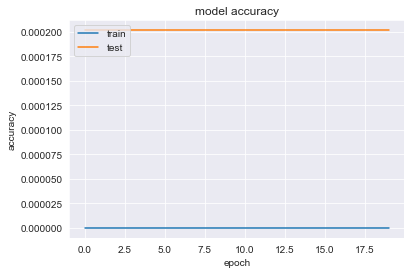

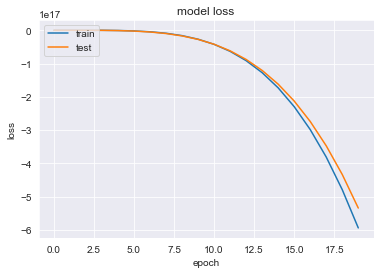

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()
#summarixe history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()